In [ ]:
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets

import time

tic = time.time()

num_epochs = 10
num_classes = 10
learning_rate = 0.01

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=256,
                                           shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=256,
                                          shuffle=False, num_workers=2)

classes = ('0', '1', '2', '3',
           '4', '5', '6', '7', '8', '9')


class CNN(nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        self.conv_layer = nn.Sequential(

            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.LeakyReLU(inplace=True),
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.LeakyReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.fc_layer = nn.Sequential(
            #nn.Dropout(p=0.1),
            nn.Linear(14 * 14 * 16, 32),
            nn.ReLU(inplace=True),
            nn.Linear(32, 16),
            nn.ReLU(inplace=True),
            #nn.Dropout(p=0.1),
            nn.Linear(16, 10)
        )

    def forward(self, x):

        # conv layers
        x = self.conv_layer(x)
        # flatten
        x = x.view(x.size(0), -1)
        # fc layer
        x = self.fc_layer(x)

        return x

def test_model(model):
  model.eval()
  with torch.no_grad():
      correct = 0
      total = 0
      for images, labels in test_loader:
          outputs = model(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

      print('Test Accuracy of the model on the 10000 test images: {} %'.format((correct / total) * 100))
  return (correct / total)

model = CNN()

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
loss_list = []
acc_list = []
per_epoch_loss_list = []
per_epoch_acc_list = []
test_per_epoch_acc_list = []

for epoch in range(num_epochs):
    epoch_no_correct=0
    epoch_total=0
    epoch_loss=0
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss_list.append(loss.item())

        # Backprop and perform Adam optimisation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track the accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        acc_list.append(correct / total)
        epoch_no_correct +=correct
        epoch_total +=total
        epoch_loss += loss.item()

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
                          (correct / total) * 100))
        
    per_epoch_loss_list.append(epoch_loss/len(train_loader))
    per_epoch_acc_list.append(epoch_no_correct/epoch_total)

    test_acc_per_epoch = test_model(model)
    test_per_epoch_acc_list.append(test_acc_per_epoch)


toc = time.time()

print('duration = ', toc - tic)
print(per_epoch_loss_list)
print(per_epoch_acc_list)
print(test_per_epoch_acc_list)



Epoch [1/10], Step [100/235], Loss: 0.4422, Accuracy: 87.89%
Epoch [1/10], Step [200/235], Loss: 0.1855, Accuracy: 93.75%
Test Accuracy of the model on the 10000 test images: 90.96 %
Epoch [2/10], Step [100/235], Loss: 0.2326, Accuracy: 92.97%
Epoch [2/10], Step [200/235], Loss: 0.1622, Accuracy: 96.09%
Test Accuracy of the model on the 10000 test images: 96.87 %
Epoch [3/10], Step [100/235], Loss: 0.0740, Accuracy: 98.05%
Epoch [3/10], Step [200/235], Loss: 0.0713, Accuracy: 98.05%
Test Accuracy of the model on the 10000 test images: 97.31 %
Epoch [4/10], Step [100/235], Loss: 0.0857, Accuracy: 98.05%


Text(0.5, 1.0, 'Batch Size = 16  (Student: Sara Ezzati,Devshree Shah,Yug Kotak ID: 40295160,40269569,40264255)')

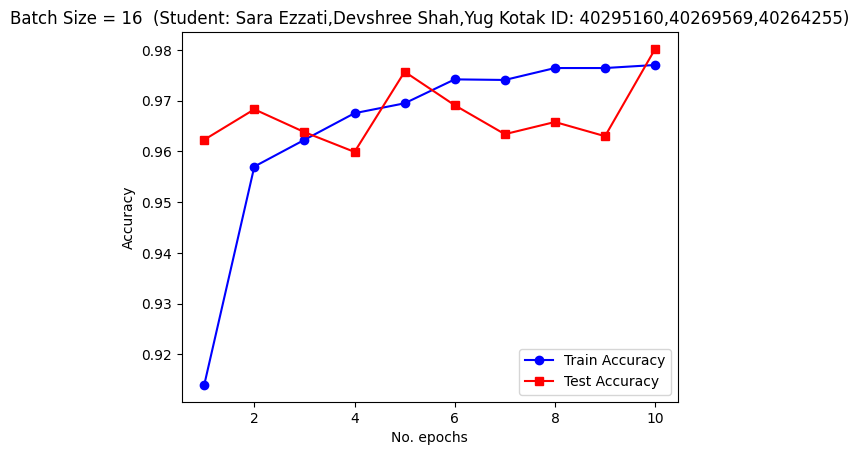

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(range(1,num_epochs+1),per_epoch_acc_list, color='blue', marker='o') 
plt.plot(range(1,num_epochs+1),test_per_epoch_acc_list,  color='red', marker='s') 
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='lower right')
plt.xlabel('No. epochs')
plt.ylabel('Accuracy')
plt.title('Batch Size = 256  (Student: Sara Ezzati,Devshree Shah,Yug Kotak ID: 40295160,40269569,40264255)')

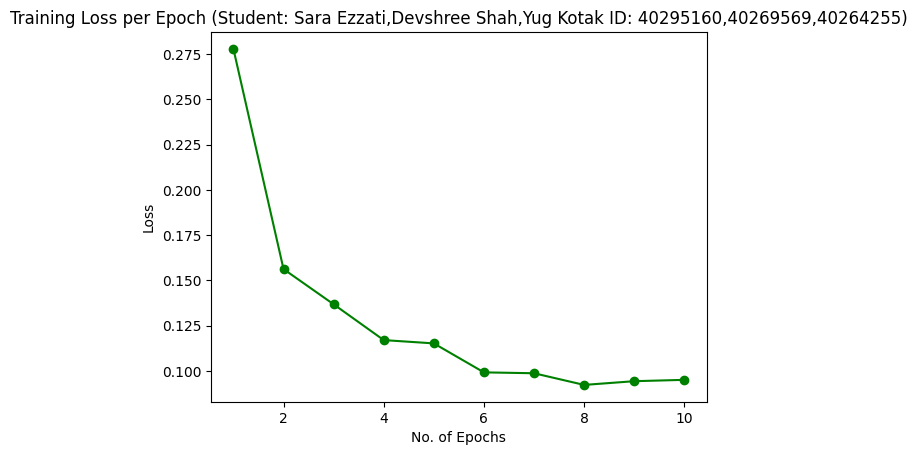

In [7]:
#plt.plot(range(1, num_epochs+1), per_epoch_loss_list, color='green', marker='o')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch (Student: Sara Ezzati,Devshree Shah,Yug Kotak ID: 40295160,40269569,40264255)')
plt.plot(range(1, num_epochs+1), per_epoch_loss_list, color='green', marker='o')

In [8]:
batch_norm_layer = None
for module in model.modules():
    if isinstance(module, torch.nn.BatchNorm2d):
        batch_norm_layer = module
        print(batch_norm_layer.bias.data)
        print(batch_norm_layer.weight.data)

tensor([-0.3701, -0.3679,  0.2440, -0.0235, -0.1511, -0.1590, -0.3419, -1.0202,
        -0.0401, -0.5153,  0.0625, -0.4532, -0.0039, -0.3113, -0.5599, -0.1908])
tensor([ 1.0455, -0.0427,  0.4888,  0.3022, -0.0158,  0.0218,  0.5656,  0.4610,
         0.5298,  0.5807,  0.4069, -0.0644,  0.3183, -0.1096, -0.0948,  0.3584])
tensor([-0.8720, -0.0492, -0.7685, -0.2288, -0.3726,  0.1071, -1.4032, -0.6454,
        -0.7126, -0.5890, -0.3037, -0.4312, -0.2475, -0.8121, -0.7710, -0.6144])
tensor([ 0.1350,  0.5920,  0.4220,  0.3391,  0.4821,  0.5007,  0.4873,  0.4730,
        -0.0480,  0.1514,  0.8141,  0.5682,  0.5180, -0.1019,  0.0292,  0.1548])
